# Yannick Augouo Lopes, Diego Estuar, Andrew Xu

# Q1

Import the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [3]:
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


# Q1.1

## Why does it makes sense to discretize columns for this problem?

Discretizing columns makes sense for this problem because it simplifies the dataset, reducing the complexity of the model and 

making it easier to interpret. By grouping continuous variables into bins, the decision tree can more easily identify and utilize 

patterns in the data, leading to potentially better performance and more understandable rules.

# Q1.2

## What might be the issues (if any) if we DID NOT discretize the columns.

Not discretizing columns might lead to issues such as overfitting, where the model becomes too complex and tailored to the training 

data, failing to generalize well to new data. Continuous variables can introduce a higher level of granularity that may not be 

meaningful or useful for the prediction task, making the model more complex and harder to interpret


# Q2 - DQA

In [4]:
#missing values
print(df.isnull().sum())
# Displaying descriptive statistics for each column
# Counting the frequency of each bin within each column separately
for col in df.select_dtypes(include=['O', 'category']).columns:
    print(df[col].value_counts())
#show the mode of the columns with the number of total frequnecy of the mode
print(df.mode())
# Showing mode and counts of the mode for each categorical variable in the DataFrame
mode_and_counts = {col: {"Mode": df[col].mode()[0], "Count": df[col].value_counts().iloc[0]} for col in df.select_dtypes(include=['O', 'category']).columns}

mode_and_counts


hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64
hours_per_week_bin
b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: count, dtype: int64
occupation_bin
c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: count, dtype: int64
msr_bin
c. High    22047
b. Mid     15868
a. Low     10927
Name: count, dtype: int64
capital_gl_bin
a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: count, dtype: int64
race_sex_bin
c. High    29737
b. Mid     16457
a. Low      2648
Name: count, dtype: int64
education_num_bin
b. 9-12    30324
c. 13       8025
a. 0-8      6408
d. 14       2657
e. 15+      1428
Name: count, dtype: int64

{'hours_per_week_bin': {'Mode': 'b. 31-40', 'Count': 26639},
 'occupation_bin': {'Mode': 'c. Mid - Mid', 'Count': 13971},
 'msr_bin': {'Mode': 'c. High', 'Count': 22047},
 'capital_gl_bin': {'Mode': 'a. = 0', 'Count': 42525},
 'race_sex_bin': {'Mode': 'c. High', 'Count': 29737},
 'education_num_bin': {'Mode': 'b. 9-12', 'Count': 30324},
 'education_bin': {'Mode': 'b. Mid', 'Count': 30324},
 'workclass_bin': {'Mode': 'b. income', 'Count': 46012},
 'age_bin': {'Mode': 'e. 40-55', 'Count': 13963},
 'flag': {'Mode': 'train', 'Count': 32561}}

### No missing value was observed

In [5]:
# potential outliers detection
# Assuming 'hours_per_week_bin' and 'y' (target variable indicating salary >50K) are relevant columns
# Let's create a hypothetical scenario based on the provided assumption

# Hypothetical scenario:
# 1. If a person works 71-100 hours but makes <=50K (y=0), consider it an outlier.
# 2. If a person works significantly fewer hours (e.g., in the lowest bin) but makes >50K (y=1), consider it an outlier.
# 3. IF a person's workclass is 'no income' but makes >50K (y=1), consider it an outlier.

# For the purpose of this example, let's assume 'a. 0-30' represents significantly fewer hours
# and 'b. 26-30 & 71-100' represents the 71-100 hours bin

# Identify potential outliers based on the described assumptions
outliers_case_1 = df[(df['hours_per_week_bin'] == 'b. 26-30 & 71-100') & (df['y'] == 0)]
outliers_case_2 = df[(df['hours_per_week_bin'] == 'a. 0-30') & (df['y'] == 1)]
outliers_case_3 = df[(df['workclass_bin'] == 'f. No income') & (df['y'] == 1)]

# Display potential outliers
#print(outliers_case_1)
print(outliers_case_2)
#print(outliers_case_3)

# Only one potential outlier was found based on the described assumptions
# but it's very likely that people who works less than 30 hours per week and makes more than 50K, and the total number is low 
# 526 people, so it's not an outlier


      hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
189              a. 0-30        e. High  c. High         a. = 0      c. High   
387              a. 0-30   b. Mid - Low  c. High         b. < 0       b. Mid   
433              a. 0-30         a. Low  c. High         a. = 0       b. Mid   
469              a. 0-30  d. Mid - High  c. High         a. = 0       b. Mid   
580              a. 0-30   b. Mid - Low  c. High         a. = 0      c. High   
...                  ...            ...      ...            ...          ...   
48397            a. 0-30   b. Mid - Low  c. High         a. = 0       b. Mid   
48473            a. 0-30   b. Mid - Low  c. High         b. < 0      c. High   
48582            a. 0-30        e. High  c. High         c. > 0      c. High   
48741            a. 0-30   b. Mid - Low  c. High         a. = 0       b. Mid   
48785            a. 0-30   c. Mid - Mid   b. Mid         c. > 0      c. High   

      education_num_bin education_bin w

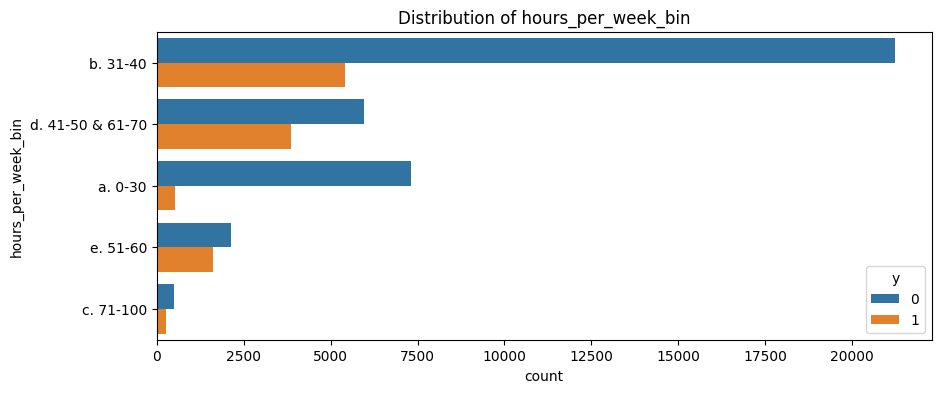

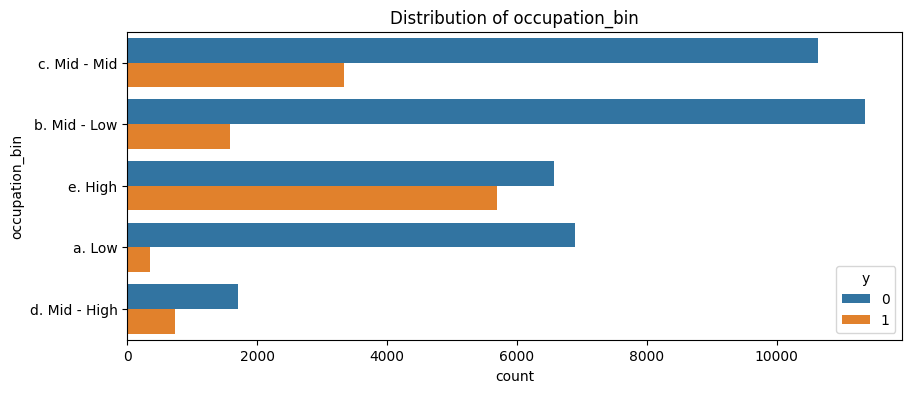

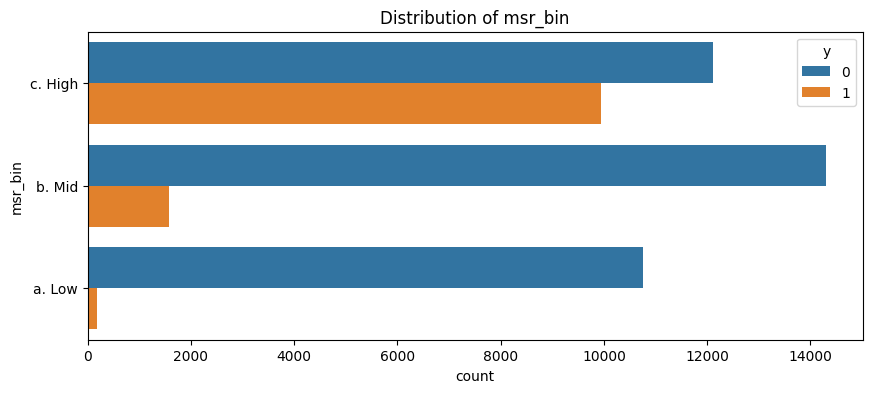

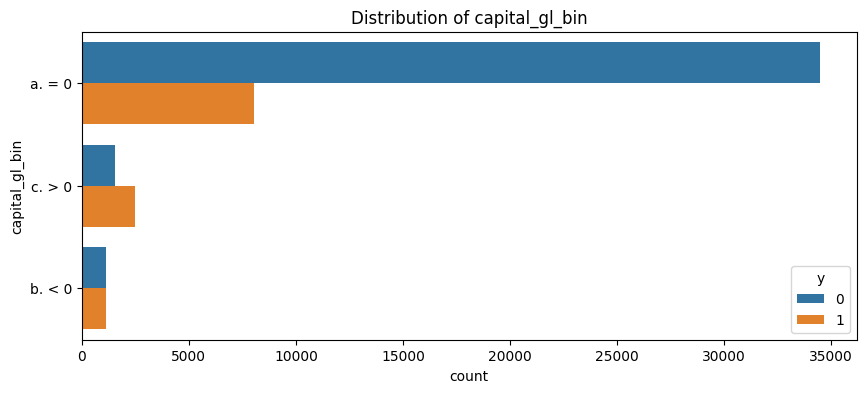

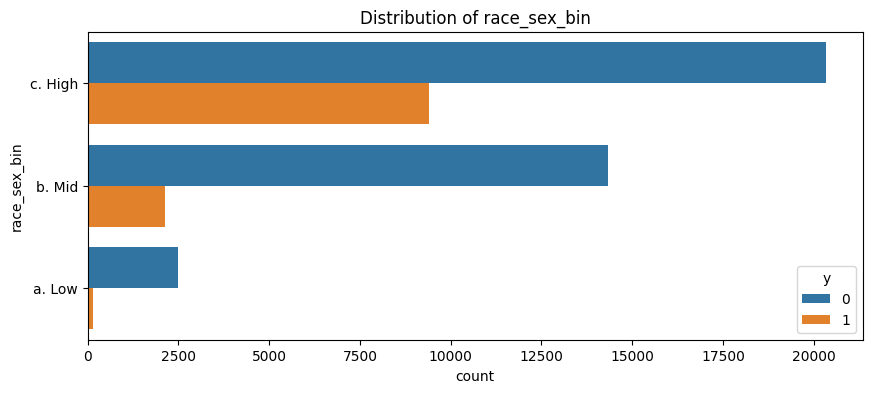

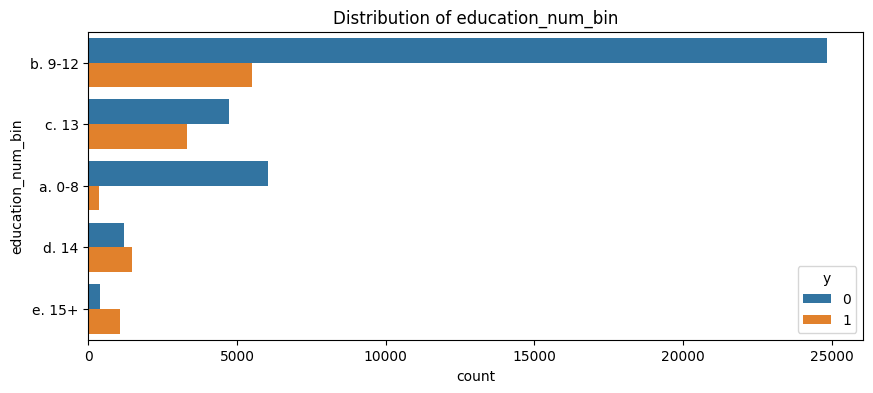

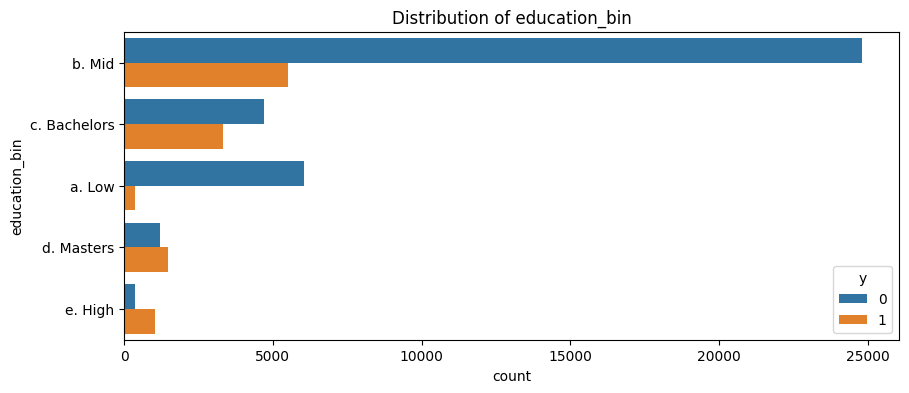

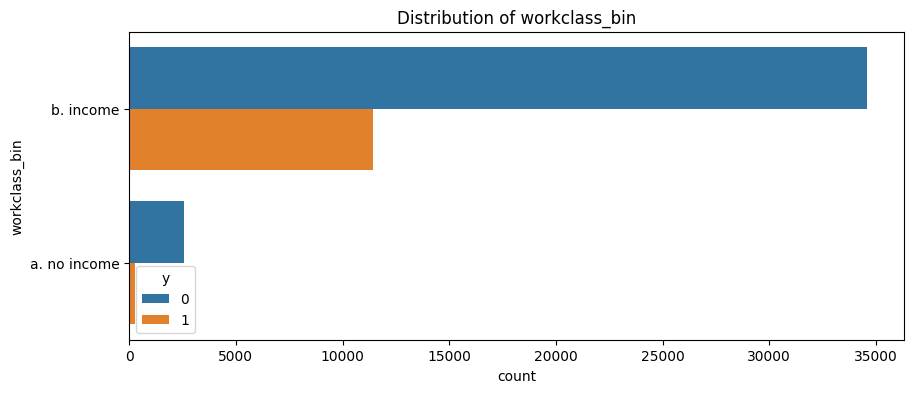

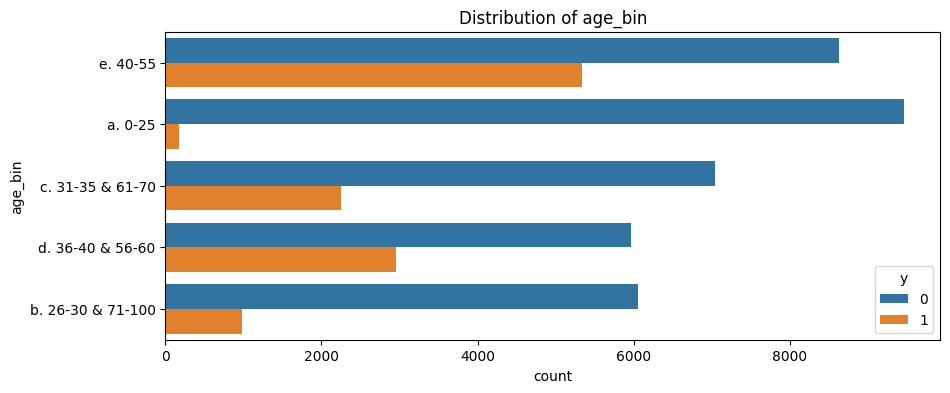

In [6]:
# visulization for frequency of each bin within each column

#Outliers Detection
#Outlier detection can be complex and depends on the specific data. 
#For numerical data, a box plot can visually show outliers. 
#For categorical data, looking at value counts can help identify categories with very few occurrences,
#which might not be useful for the model.  

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of each categorical column
categorical_columns = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 
                       'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 
                       'education_bin', 'workclass_bin', 'age_bin']

for column in categorical_columns:
    plt.figure(figsize=(10, 4))  # Set the figure size for better readability
    #change color for each bar
    sns.countplot(y=column, data=df, order = df[column].value_counts().index, hue = 'y')
    plt.title(f'Distribution of {column}')
    plt.show()

# Q3. Build Decision Tree Classifier Models

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [8]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
# we have a flag column indicating which rows are for training and which are for testing
# we will use this column to split the data into training and testing sets
#print(df_encoded.head())
X_train = df_encoded[df_encoded['flag_train'] == 1].drop(['flag_train', 'y'], axis=1)
y_train = df_encoded[df_encoded['flag_train'] == 1]['y']
X_test = df_encoded[df_encoded['flag_train'] == 0].drop(['flag_train', 'y'], axis=1)
y_test = df_encoded[df_encoded['flag_train'] == 0]['y']
#initialize the model
model = DecisionTreeClassifier(random_state=42)
#fit the model
model.fit(X_train, y_train)
#predict the model
y_pred = model.predict(X_test)
#calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score is {accuracy}\n')
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'This is the confusion matrix: \n{conf_matrix}\n')
#classification report
class_report = classification_report(y_test, y_pred)
print(f'This is the classicfication report: \n{class_report}\n')
# Explaining the model: the confusion matrix shows that the model has 11480 true positives and 2131 true negatives

Accuracy score is 0.8360051593882439

This is the confusion matrix: 
[[11480   955]
 [ 1715  2131]]

This is the classicfication report: 
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.55      0.61      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281




# Q5. Tune Decision Tree Performance

Time to tune the model: 0.8176641464233398 seconds

Run 1 - Split Criterion 

  Split Criterion  Accuracy  Precision    Recall  F1 Score
0         entropy  0.836128   0.690615  0.554862   0.61534
1            gini  0.836005   0.690538  0.554082   0.61483

Run 2 - Min Samples Leaf Value 

   Min Samples Leaf Value  Accuracy  Precision    Recall  F1 Score
3                      20  0.841042   0.690538  0.554082   0.61483
2                      15  0.840673   0.690538  0.554082   0.61483
6                      35  0.840366   0.690538  0.554082   0.61483
5                      30  0.840120   0.690538  0.554082   0.61483
4                      25  0.839936   0.690538  0.554082   0.61483
1                      10  0.839752   0.690538  0.554082   0.61483
7                      40  0.839629   0.690538  0.554082   0.61483
0                       5  0.838032   0.690538  0.554082   0.61483

Run 3 - Max Features

   Max Features  Accuracy  Precision    Recall  F1 Score
8           0.9  0.842147   

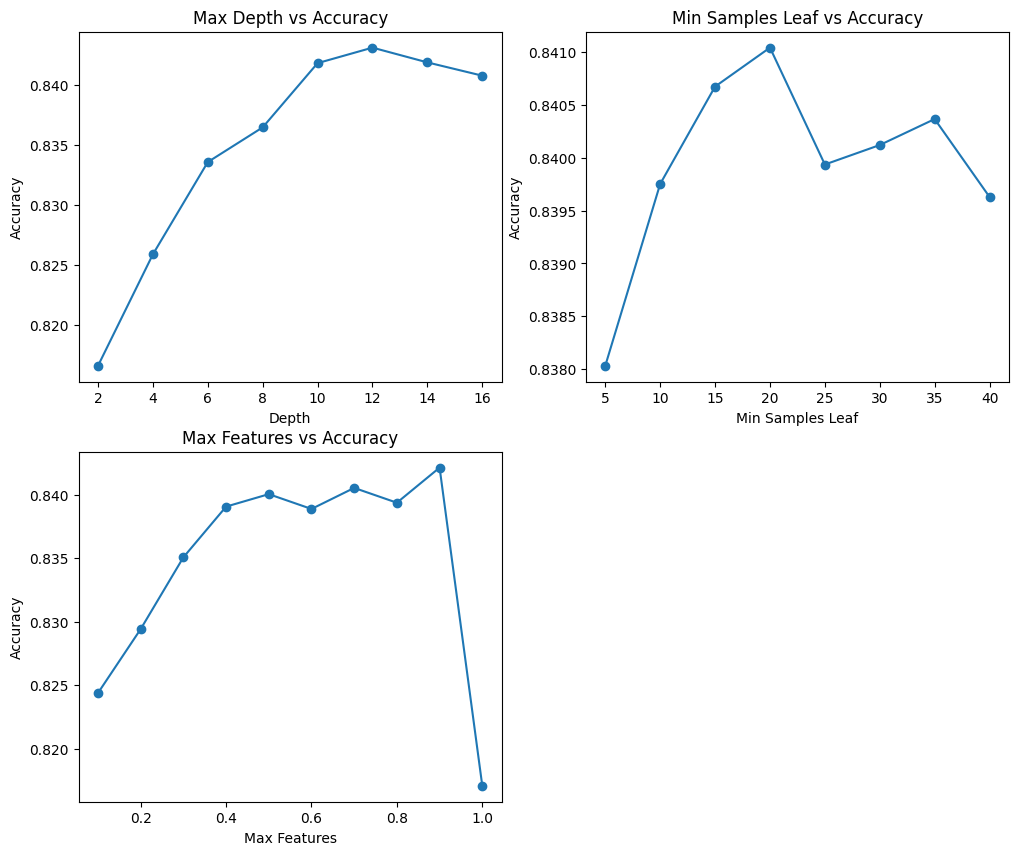

Best hyperparameters: {'criterion': 'entropy', 'min_samples_leaf': 20, 'max_features': 0.9, 'max_depth': 12}

Best accuracy: 0.8430686075793871



In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
#create dataframe to store the each run's results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
#time the tuning process
import time
start = time.time()
#initialize the model
model = DecisionTreeClassifier(random_state=42)
#fit the model
model.fit(X_train, y_train)
#predict the model
y_pred = model.predict(X_test)
#calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
#calculate the precision
precision = precision_score(y_test, y_pred)
#calculate the recall
recall = recall_score(y_test, y_pred)
#calculate the f1 score
f1 = f1_score(y_test, y_pred)


# Initialize the best hyperparameters with default values
best_params = {
    'criterion': 'gini',  # Default criterion
    'min_samples_leaf': 1,  # Default minimum samples leaf
    'max_features': None,  # Default maximum features
    'max_depth': None,  # Default maximum depth
}

# Lists to store hyperparameter values and their corresponding accuracies
criteria_values = []
criteria_accuracies = []
criteria_precisions = []
criteria_recalls = []
criteria_f1s = []

split_criteria = ['entropy', 'gini']
# Run 1: Vary Split Criteria
for criterion in split_criteria:
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    criteria_values.append(criterion)
    criteria_accuracies.append(accuracy)
    criteria_precisions.append(precision)
    criteria_recalls.append(recall)
    criteria_f1s.append(f1)


# Determine the best split criteria based on accuracy
best_params['criterion'] = criteria_values[criteria_accuracies.index(max(criteria_accuracies))]

# Run 2: Vary Minimum Sample Leaf using the best criterion from Run 1
min_samples_leaf_values = [5, 10, 15, 20, 25, 30, 35, 40]
min_samples_leaf_accuracies = []
min_samples_leaf_precisions = []
min_samples_leaf_recalls = []
min_samples_leaf_f1s = []


for min_samples_leaf in min_samples_leaf_values:
    clf = DecisionTreeClassifier(criterion=best_params['criterion'], min_samples_leaf=min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    min_samples_leaf_accuracies.append(accuracy)
    min_samples_leaf_precisions.append(precision)
    min_samples_leaf_recalls.append(recall)
    min_samples_leaf_f1s.append(f1)
    

# Determine the best min_samples_leaf based on accuracy
best_params['min_samples_leaf'] = min_samples_leaf_values[min_samples_leaf_accuracies.index(max(min_samples_leaf_accuracies))]

# Run 3: Vary Maximum Features using the best parameters from Runs 1 & 2
max_features_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
max_features_accuracies = []
max_features_precisions = []
max_features_recalls = []
max_features_f1s = []


for max_features in max_features_values:
    clf = DecisionTreeClassifier(criterion=best_params['criterion'], min_samples_leaf=best_params['min_samples_leaf'], max_features=max_features, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    max_features_accuracies.append(accuracy)
    max_features_precisions.append(precision)
    max_features_recalls.append(recall)
    max_features_f1s.append(f1)
    

# Determine the best max_features based on accuracy
best_params['max_features'] = max_features_values[max_features_accuracies.index(max(max_features_accuracies))]

# Run 4: Vary Maximum Depth using the best parameters from Runs 1, 2 & 3
max_depth_values = [2, 4, 6, 8, 10, 12, 14, 16]
max_depth_accuracies = []
max_depth_precisions = []
max_depth_recalls = []
max_depth_f1s = []


for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion=best_params['criterion'], min_samples_leaf=best_params['min_samples_leaf'], max_features=best_params['max_features'], max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    max_depth_accuracies.append(accuracy)
    max_depth_precisions.append(precision)
    max_depth_recalls.append(recall)
    max_depth_f1s.append(f1)

# Determine the best max_depth based on accuracy
best_params['max_depth'] = max_depth_values[max_depth_accuracies.index(max(max_depth_accuracies))]
#end of the tuning process
end = time.time()
#print the time it took to tune the model
print(f'Time to tune the model: {end - start} seconds\n')
#store the results
#results = results.append({'Model': 'Decision Tree', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)

#run 1 results
results_run1 = {'Split Criterion': criteria_values, 'Accuracy': criteria_accuracies, 'Precision': criteria_precisions, 'Recall': criteria_recalls, 'F1 Score': criteria_f1s}
df_results_run1 = pd.DataFrame(results_run1).sort_values(by='Accuracy', ascending=False)
print(f'Run 1 - Split Criterion \n\n{df_results_run1}\n')

#run 2 results
results_run2 = {'Min Samples Leaf Value': min_samples_leaf_values, 
                'Accuracy': min_samples_leaf_accuracies, 'Precision': min_samples_leaf_precisions, 
                'Recall': min_samples_leaf_recalls, 'F1 Score': min_samples_leaf_f1s}
df_results_run2 = pd.DataFrame(results_run2).sort_values(by='Accuracy', ascending=False)
print(f'Run 2 - Min Samples Leaf Value \n\n{df_results_run2}\n')

#run 3 results
results_run3 = {'Max Features': max_features_values, 'Accuracy': max_features_accuracies, 'Precision': max_features_precisions, 'Recall': max_features_recalls, 'F1 Score': max_features_f1s}
df_results_run3 = pd.DataFrame(results_run3).sort_values(by='Accuracy', ascending=False)
print(f'Run 3 - Max Features\n\n{df_results_run3}\n')

#run 4 results
results_run4 = {'Max Depth': max_depth_values, 'Accuracy': max_depth_accuracies, 'Precision': max_depth_precisions, 'Recall': max_depth_recalls, 'F1 Score': max_depth_f1s}
df_results_run4 = pd.DataFrame(results_run4).sort_values(by='Accuracy', ascending=False)
print(f'Run 4 - Max Depth\n\n{df_results_run4}\n')


# Plotting the results
plt.figure(figsize=(12, 10))

# Max Depth Plot
plt.subplot(2, 2, 1)
plt.plot(max_depth_values, max_depth_accuracies, marker='o')
plt.title('Max Depth vs Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

# Min Samples Leaf Plot
plt.subplot(2, 2, 2)
plt.plot(min_samples_leaf_values, min_samples_leaf_accuracies, marker='o')
plt.title('Min Samples Leaf vs Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')

# Max Features Plot
plt.subplot(2, 2, 3)
plt.plot(max_features_values, max_features_accuracies, marker='o')
plt.title('Max Features vs Accuracy')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.show()
#best hyperparameters and their corresponding accuracies
print(f'Best hyperparameters: {best_params}\n')
#best accuracy
print(f'Best accuracy: {max(max_depth_accuracies)}\n')

### Also record the parameters used for runs

In [19]:
#to match the length of each runs
#record all the parameters
results = {'Run 1': split_criteria,
           'Run 2': min_samples_leaf_values,
           'Run 3': max_features_values,
           'Run 4': max_depth_values}

length_diffs = []
max_length = max(len(criteria_values), len(min_samples_leaf_values), len(max_features_values), len(max_depth_values))
for values_list in [criteria_values, min_samples_leaf_values, max_features_values, max_depth_values]:
    length_diffs.append(max_length - len(values_list))
print("Length differences:", length_diffs)

for run, values_list in results.items():
    diff = max_length - len(values_list)
    results[run].extend([None] * diff)

print("Results with None values extended:")
print(pd.DataFrame(results))


Length differences: [8, 2, 0, 2]
Results with None values extended:
     Run 1  Run 2  Run 3  Run 4
0  entropy    5.0    0.1    2.0
1     gini   10.0    NaN    4.0
2     None   15.0    0.3    6.0
3     None   20.0    0.4    8.0
4     None   25.0    0.5   10.0
5     None   30.0    0.6   12.0
6     None   35.0    0.7   14.0
7     None   40.0    0.8   16.0
8     None    NaN    0.9    NaN
9     None    NaN    1.0    NaN


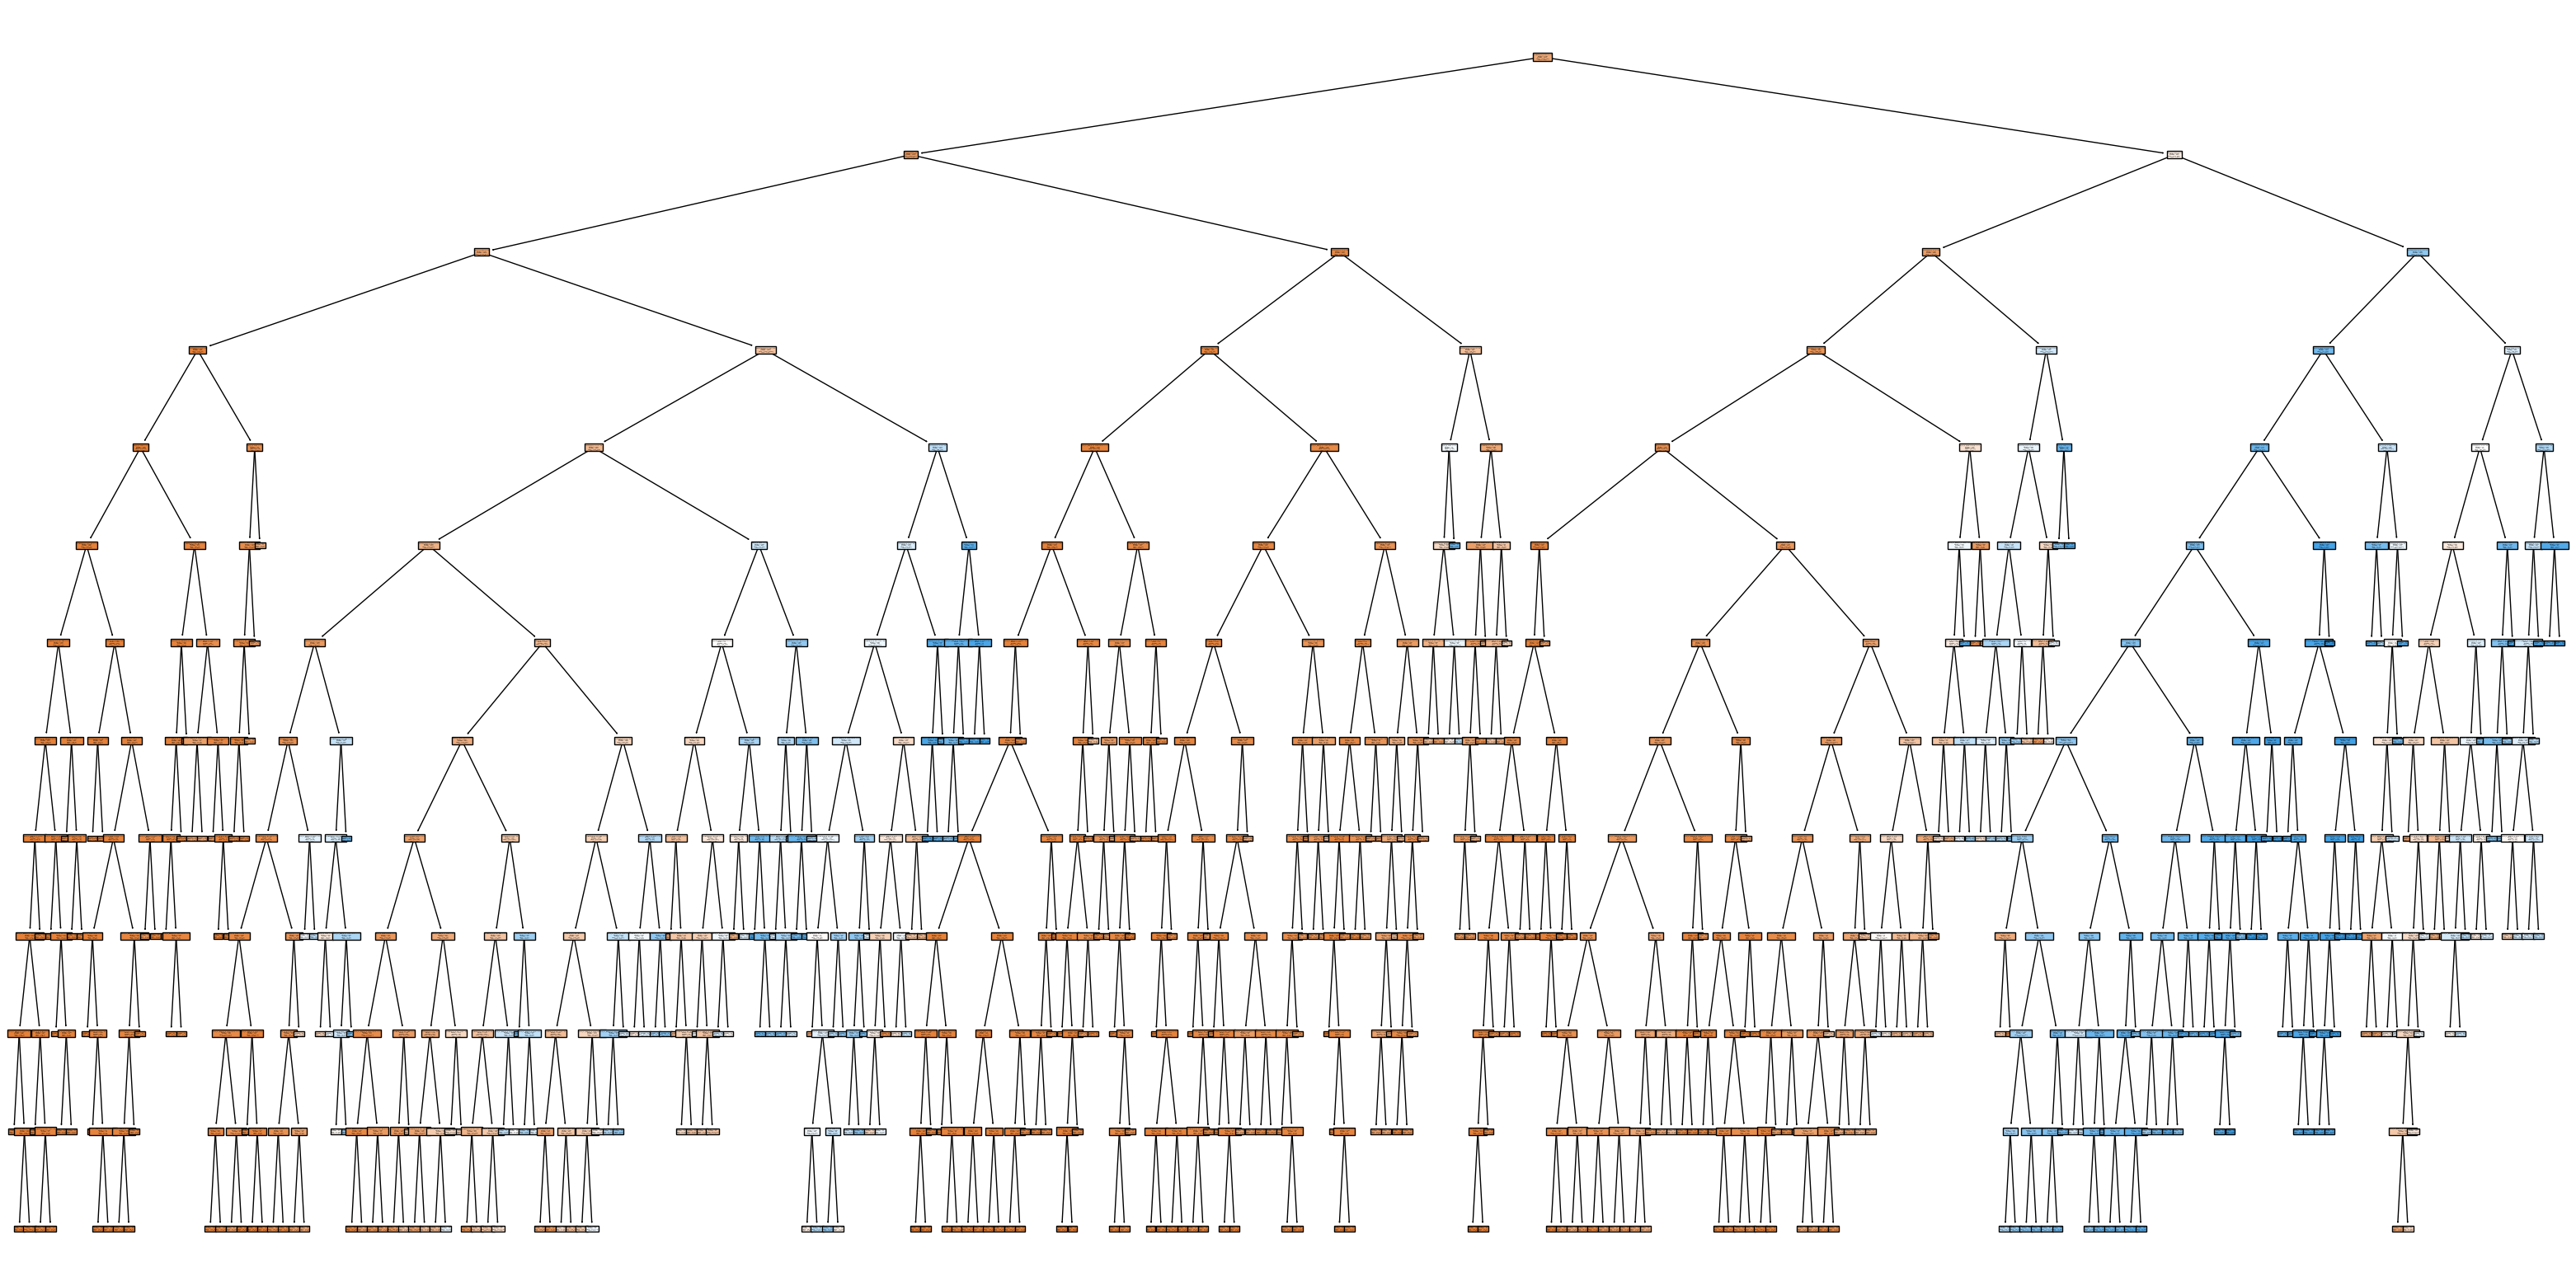

In [21]:
#Visualize Your Best Decision Tree 

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
#call the best hyperparameters
best_dtree = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    random_state=42
)
best_dtree.fit(X_train, y_train)
# Convert the DataFrame columns attribute to a list
feature_names_list = X_train.columns.tolist()

# Visualize the decision tree using the best estimator
plt.figure(figsize=(40,20))  # Set the size of the figure
plot_tree(
    best_dtree,
    feature_names=feature_names_list,
    class_names=['<=50K', '>50K'],  # Adjust the class names as needed
    filled=True
)
plt.show()

# 7. Conclusion
## Explain your observations from the above performance tuning effort.

The tuning process didn't necessarily increase much of the performance.

## Q.4 How long was your total run time to train the best model?

about 0.8 seconds

## Q.5 Did you find the BEST TREE?

No, I think the tree can still be improved by using gridsearch 

## Q.6 Write your observations from the visualization of the best tree

From the visualization, the tree appears to be very large and deep with many leaf nodes. It suggests a highly complex model that might have learned to fit the training data too closely, capturing noise as signal, which is indicative of overfitting

## Q.7 Will this Tree “overfit”?

>Based on the provided metrics for the testing data, the decision tree model appears to perform reasonably well, especially in predicting the majority class.

>The specific observations from the notebook indicate that the tree is "very large and deep with many leaf nodes." This complexity is a strong indication of overfitting because such trees are sensitive to the specific details and idiosyncrasies of the training data, rather than capturing the underlying patterns that would apply more broadly.

>With the model's performance on the training set and the provided testing metrics, we can now compare the two to assess the presence of overfitting.

>Best Hyperparameters: The best model was found using the hyperparameters: 'criterion': 'entropy', 'min_samples_leaf': 20, 'max_features': 0.9, 'max_depth': 12.

>Best Accuracy on Training Data: The accuracy on the training set is 0.8431 (or about 84.31%).

>Accuracy on Testing Data: The accuracy on the testing set is approximately 0.8360 (or about 83.60%).

>The accuracy on the training data is very close to the accuracy on the testing data, with a difference of less than 1%. This small difference suggests that the model is generalizing well to new data and is not significantly overfitting. Overfitting would typically be indicated by a much larger discrepancy where the model performs exceptionally well on the training data but poorly on the testing data.

>Furthermore, the chosen hyperparameters suggest some measures to prevent overfitting were taken:

>'min_samples_leaf': 20 - This ensures that each leaf has a sufficient number of instances, which prevents the model from learning noise in the training data.
>'max_features': 0.9 - Using less than all features for splitting at each node introduces more randomness and helps in preventing overfitting.
>'max_depth': 12 - Limiting the depth of the tree helps to prevent the model from becoming too complex.

>In conclusion, based on the provided training and testing metrics, the decision tree model appears to generalize well and does not show significant signs of overfitting. The careful selection of hyperparameters has likely contributed to a model that balances well between fitting the training data and maintaining good performance on unseen data.


# 8. Prediction

In [ ]:
pd.set_option('future.no_silent_downcasting', True)
# Define the new individual's information as a dictionary
new_individual = {
    'hours_per_week_bin': ['d. 41-50 & 61-70'],  # Assuming 48 hours falls into this bin
    'occupation_bin': ['b. Mid - Low'],
    'msr_bin': ['c. High'],  # Assuming Marriage Status & Relationships = High falls into this bin
    'capital_gl_bin': ['c. > 0'],  # Assuming Capital Gain = Yes falls into this bin
    'race_sex_bin': ['b. Mid'],
    'education_num_bin': ['b. 9-12'],  # Assuming Number of Years of Education = 12 falls into this bin
    'education_bin': ['e. High'],  # Assuming Education Category = High falls into this bin
    'workclass_bin': ['b. income'],  # Assuming Work Class = Income falls into this bin
    'age_bin': ['e. 51-60']  # Assuming Age = 58 falls into this bin
}

# Create a DataFrame for the new individual
new_individual_df = pd.DataFrame(new_individual)

# Apply the same encoding as the training dataset
new_individual_encoded = pd.get_dummies(new_individual_df)

# Align the new individual DataFrame with the training data (add missing columns with 0s)
final_new_individual_df = pd.DataFrame(columns=df_encoded.columns, index=range(1))
final_new_individual_df.update(new_individual_encoded, overwrite=False)
final_new_individual_df = final_new_individual_df.fillna(0).infer_objects(copy=False)


# Display the DataFrame ready for prediction
final_new_individual_df = final_new_individual_df.drop(['flag_train', 'y'], axis=1)

# Predict the income of the new individual
prediction = best_dtree.predict(final_new_individual_df)
#find out “probability score” variable outputted
probability = best_dtree.predict_proba(final_new_individual_df)
print("Prediction: ", prediction[0]) # 0: <=50K, 1: >50K
print("Probability: ", probability[0][prediction[0]])


>Based on the provided metrics for the testing data, the decision tree model appears to perform reasonably well, especially in predicting the majority class.

>The specific observations from the notebook indicate that the tree is "very large and deep with many leaf nodes." This complexity is a strong indication of overfitting because such trees are sensitive to the specific details and idiosyncrasies of the training data, rather than capturing the underlying patterns that would apply more broadly.

>With the model's performance on the training set and the provided testing metrics, we can now compare the two to assess the presence of overfitting.

>Best Hyperparameters: The best model was found using the hyperparameters: 'criterion': 'entropy', 'min_samples_leaf': 20, 'max_features': 0.9, 'max_depth': 12.

>Best Accuracy on Training Data: The accuracy on the training set is 0.8431 (or about 84.31%).

>Accuracy on Testing Data: The accuracy on the testing set is approximately 0.8360 (or about 83.60%).

>The accuracy on the training data is very close to the accuracy on the testing data, with a difference of less than 1%. This small difference suggests that the model is generalizing well to new data and is not significantly overfitting. Overfitting would typically be indicated by a much larger discrepancy where the model performs exceptionally well on the training data but poorly on the testing data.

>Furthermore, the chosen hyperparameters suggest some measures to prevent overfitting were taken:

>'min_samples_leaf': 20 - This ensures that each leaf has a sufficient number of instances, which prevents the model from learning noise in the training data.
>'max_features': 0.9 - Using less than all features for splitting at each node introduces more randomness and helps in preventing overfitting.
>'max_depth': 12 - Limiting the depth of the tree helps to prevent the model from becoming too complex.

>In conclusion, based on the provided training and testing metrics, the decision tree model appears to generalize well and does not show significant signs of overfitting. The careful selection of hyperparameters has likely contributed to a model that balances well between fitting the training data and maintaining good performance on unseen data.